<a href="https://colab.research.google.com/github/christielay/Coursera_Capstone/blob/main/Capstone_Project_The_Battle_of_Neighborhoods_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - The Battle of Neighborhoods
### Week 1
### Applied Data Science Capstone by IBM

### Introduction: Business Problem

A real estate investor is planning on investing some properties in LA county. He would like to gain some insights in the area so he knows where to put the right investment. 

The purpose of this project aims to help real estate investors to target the properties that’s worth investing. Apart from venues around the neighborhood, safety and rental price might as well be the factors which affect tenant’s decision.



### Data

* USCities - City name, County, State, Latitude, Longtitude. This dataset is used to generate map.
(Source:https://simplemaps.com/data/us-cities)
* Foursquare API - Explore neighborhood with its top venues
* LA crime data - This dataset contains crime rate for each city in LA county. (Source:https://en.wikipedia.org/wiki/California_locations_by_crime_rate)
* Rent data - This dataset contains rent data in different area. 
(Source: https://www.huduser.gov/portal/datasets/fmr.html#2021_data)
* zipcode - This dataset contains zipcode, city namem, Latitude and Longtitude in CA.
(Source: https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/)


First, we import the libraries we will be using in the project

In [3]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import requests

import plotly.graph_objects as go
import plotly.express as px

print('Libraries imported.')

Libraries imported.


#### Import Data 

uscities

In [4]:
uscities = 'https://drive.google.com/file/d/1DJz5ZJJvcnvKPBWwuZaJhzHjEqd2p79N/view?usp=sharing'
uscities_id = uscities.split('/')[-2]
uscities_url ='https://drive.google.com/uc?id=' + uscities_id
uscities = pd.read_csv(uscities_url)
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


The dataset contains information for all the states in the US. We only need data for LA county, so we filter out the cities which has county name as Los Angeles.

In [5]:
LA = uscities[uscities['county_name'] == 'Los Angeles']
LA.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
93,Long Beach,Long Beach,CA,California,6037,Los Angeles,33.7981,-118.1675,462628,3523,polygon,False,True,America/Los_Angeles,2,90822 90804 90805 90806 90807 90802 90803 9080...,1840020490
125,Lancaster,Lancaster,CA,California,6037,Los Angeles,34.6935,-118.1753,343304,645,polygon,False,True,America/Los_Angeles,2,93535 93534 93536 93539 93584,1840020516
143,Santa Clarita,Santa Clarita,CA,California,6037,Los Angeles,34.4175,-118.4964,312446,1162,polygon,False,True,America/Los_Angeles,2,91321 91351 91350 91355 91354 91387 91322 9138...,1840021864
226,Glendale,Glendale,CA,California,6037,Los Angeles,34.1818,-118.2468,199303,2525,polygon,False,True,America/Los_Angeles,2,91210 91214 91046 91201 91204 91208 91203 9120...,1840020483


In [6]:
#check on data type
LA.dtypes

city             object
city_ascii       object
state_id         object
state_name       object
county_fips       int64
county_name      object
lat             float64
lng             float64
population        int64
density           int64
source           object
military           bool
incorporated       bool
timezone         object
ranking           int64
zips             object
id                int64
dtype: object

Select the columns and save it to a new dataframe - LA_new

In [7]:
LA_new = LA[['city','state_name', 'county_fips','county_name', 'lat', 'lng']]

In [8]:
LA_new.head()

,city,state_name,county_fips,county_name,lat,lng
1,Los Angeles,California,6037,Los Angeles,34.1139,-118.4068
93,Long Beach,California,6037,Los Angeles,33.7981,-118.1675
125,Lancaster,California,6037,Los Angeles,34.6935,-118.1753
143,Santa Clarita,California,6037,Los Angeles,34.4175,-118.4964
226,Glendale,California,6037,Los Angeles,34.1818,-118.2468


In [9]:
LA_new.shape

(140, 6)

#### Foursquare API

We will use foursquare API to explore around the area

In [10]:
CLIENT_ID = 'T2Z2EXSV5R0BXRK3CB2S0U5D0SX1JRXBJRJCVMFDBVSITWSO' # your Foursquare ID
CLIENT_SECRET = 'CKZJEJIU0OZK2ZJ5VQRHHUO4S3OKXBR2NY4Q4Y4SKLZH0X4W' # your Foursquare Secret
ACCESS_TOKEN = 'F3BQMM1O2VAJ201SFO1VP5S2G3UFJPWU15VZJHHMP1EELFET' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T2Z2EXSV5R0BXRK3CB2S0U5D0SX1JRXBJRJCVMFDBVSITWSO
CLIENT_SECRET:CKZJEJIU0OZK2ZJ5VQRHHUO4S3OKXBR2NY4Q4Y4SKLZH0X4W


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
LA_venues = getNearbyVenues(names=LA_new['city'],
                            latitudes=LA_new['lat'],
                            longitudes=LA_new['lng'])

Los Angeles
Long Beach
Lancaster
Santa Clarita
Glendale
Palmdale
Pomona
Torrance
Pasadena
East Los Angeles
El Monte
Downey
Inglewood
West Covina
Norwalk
Burbank
Compton
South Gate
Carson
Santa Monica
Hawthorne
Whittier
Alhambra
Lakewood
Bellflower
Baldwin Park
Lynwood
Redondo Beach
Florence-Graham
Pico Rivera
Montebello
South Whittier
Monterey Park
Gardena
Arcadia
Huntington Park
Diamond Bar
Hacienda Heights
Rosemead
Paramount
Glendora
Rowland Heights
Azusa
Cerritos
La Mirada
Covina
Altadena
Bell Gardens
Rancho Palos Verdes
San Gabriel
La Puente
Culver City
West Hollywood
Monrovia
Claremont
Temple City
Bell
Westmont
Manhattan Beach
Beverly Hills
San Dimas
Lawndale
La Verne
Walnut
Maywood
West Whittier-Los Nietos
South Pasadena
San Fernando
Calabasas
Valinda
Cudahy
West Puente Valley
West Rancho Dominguez
Willowbrook
West Carson
Lennox
Duarte
South El Monte
Lomita
Agoura Hills
La Cañada Flintridge
South San Jose Hills
La Crescenta-Montrose
Castaic
Hermosa Beach
Stevenson Ranch
Santa Fe 

In [11]:
print(LA_venues.shape)
LA_venues

(1082, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Los Angeles,34.1139,-118.4068,Poolside BH,34.113805,-118.403169,Pool
1,Long Beach,33.7981,-118.1675,Signal Hill Skyline,33.799343,-118.165590,Park
2,Long Beach,33.7981,-118.1675,Hilltop Park,33.799255,-118.165109,Park
3,Long Beach,33.7981,-118.1675,The Home Depot,33.801868,-118.166359,Hardware Store
4,Long Beach,33.7981,-118.1675,Mother's Market & Kitchen,33.802214,-118.168039,Organic Grocery
...,...,...,...,...,...,...,...
1077,Industry,34.0175,-117.9267,Red Restaurant @ Pacifc Palms Hotel & Conferen...,34.020758,-117.926322,Restaurant
1078,Industry,34.0175,-117.9267,St. Andrew's Commons,34.020777,-117.927096,Golf Course
1079,Industry,34.0175,-117.9267,Panaderia La Mexicana,34.014103,-117.923180,Bakery
1080,Vernon,34.0019,-118.2106,Loveseat.com Online Furniture Auction Los Angeles,33.999964,-118.206722,Furniture / Home Store


In [13]:
print('There are {} uniques categories.'.format(len(LA_venues['Venue Category'].unique())))

There are 220 uniques categories.


In [14]:
# one hot encoding
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Big Box Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,...,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Veterans' Organization,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Los Angeles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Long Beach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Long Beach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Long Beach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Long Beach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
LA_onehot.shape

(1082, 221)

In [16]:
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped.head()

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Big Box Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,...,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Veterans' Organization,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Acton,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agoura Hills,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.000000,0.047619,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agua Dulce,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alhambra,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alondra Park,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
LA_grouped.shape

(128, 221)

In [18]:
LA_num_top_venues = 10

for hood in LA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(LA_num_top_venues))
    print('\n')

----Acton----
                     venue  freq
0           Sandwich Place   1.0
1                      ATM   0.0
2             Optical Shop   0.0
3            Movie Theater   0.0
4            Moving Target   0.0
5                   Museum   0.0
6              Music Store   0.0
7          Nature Preserve   0.0
8  New American Restaurant   0.0
9                Nightclub   0.0


----Agoura Hills----
                  venue  freq
0  Fast Food Restaurant  0.10
1                   ATM  0.05
2    Italian Restaurant  0.05
3           Coffee Shop  0.05
4         Deli / Bodega  0.05
5           Gas Station  0.05
6         Grocery Store  0.05
7        Ice Cream Shop  0.05
8     Indian Restaurant  0.05
9    Mexican Restaurant  0.05


----Agua Dulce----
                     venue  freq
0                  Airport   1.0
1                      ATM   0.0
2             Optical Shop   0.0
3            Movie Theater   0.0
4            Moving Target   0.0
5                   Museum   0.0
6              Mus

In [19]:
def return_most_common_venues(row, LA_num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:LA_num_top_venues]

In [119]:
LA_num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(LA_num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
LA_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
LA_neighborhoods_venues_sorted['Neighborhood'] = LA_grouped['Neighborhood']

for ind in np.arange(LA_grouped.shape[0]):
    LA_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], LA_num_top_venues)

LA_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Sandwich Place,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
1,Agoura Hills,Fast Food Restaurant,ATM,Italian Restaurant,Pharmacy,Pizza Place,Coffee Shop,Deli / Bodega,Shipping Store,Mexican Restaurant,Smoke Shop
2,Agua Dulce,Airport,Yoga Studio,Donut Shop,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
3,Alhambra,Convenience Store,Video Store,Pizza Place,Pet Store,Business Service,Fast Food Restaurant,Breakfast Spot,Sporting Goods Shop,Hardware Store,Mexican Restaurant
4,Alondra Park,Park,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm


### K-Means Clustering

Now we are ready  to cluster the venues according to their venue categories.

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [22]:
LA_grouped_clustering = LA_grouped.drop('Neighborhood', 1)

In [23]:
mms = MinMaxScaler()
mms.fit(LA_grouped_clustering)
data_transformed = mms.transform(LA_grouped_clustering)

In [117]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km
    .inertia_)

We obtain the best k for our clustering via elbow method. According to the result, we will set k to 8.

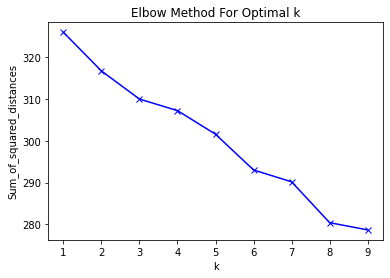

In [118]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [120]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [121]:
# add clustering labels
LA_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [122]:
LA_neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Acton,Sandwich Place,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
1,1,Agoura Hills,Fast Food Restaurant,ATM,Italian Restaurant,Pharmacy,Pizza Place,Coffee Shop,Deli / Bodega,Shipping Store,Mexican Restaurant,Smoke Shop
2,1,Agua Dulce,Airport,Yoga Studio,Donut Shop,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
3,1,Alhambra,Convenience Store,Video Store,Pizza Place,Pet Store,Business Service,Fast Food Restaurant,Breakfast Spot,Sporting Goods Shop,Hardware Store,Mexican Restaurant
4,0,Alondra Park,Park,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm


In [123]:
LA_merged = LA_new

LA_merged = LA_merged.join(LA_neighborhoods_venues_sorted.set_index('Neighborhood'), on='city')

LA_merged.head()

,city,state_name,county_fips,county_name,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Los Angeles,California,6037,Los Angeles,34.1139,-118.4068,5.0,Pool,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm,Event Service
93,Long Beach,California,6037,Los Angeles,33.7981,-118.1675,0.0,Park,Hardware Store,Food Truck,Trail,Scenic Lookout,Organic Grocery,Event Service,Donburi Restaurant,Donut Shop,Electronics Store
125,Lancaster,California,6037,Los Angeles,34.6935,-118.1753,1.0,Discount Store,Department Store,Fast Food Restaurant,Sandwich Place,Chinese Restaurant,Pet Store,Cosmetics Shop,Paper / Office Supplies Store,Optical Shop,ATM
143,Santa Clarita,California,6037,Los Angeles,34.4175,-118.4964,1.0,Gym,Mexican Restaurant,Chinese Restaurant,Burger Joint,Donut Shop,Liquor Store,Tattoo Parlor,Gastropub,Greek Restaurant,Hardware Store
226,Glendale,California,6037,Los Angeles,34.1818,-118.2468,3.0,Trail,Yoga Studio,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market


In [124]:
LA_merged.dtypes

city                       object
state_name                 object
county_fips                 int64
county_name                object
lat                       float64
lng                       float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [125]:
LA_merged_new = LA_merged.dropna()

In [126]:
LA_merged_new.dtypes

city                       object
state_name                 object
county_fips                 int64
county_name                object
lat                       float64
lng                       float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [127]:
LA_merged_new["Cluster Labels"] = LA_merged_new["Cluster Labels"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We generate scatter plot of each cluster using plotly.

In [128]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0aWVsYXkiLCJhIjoiY2tud2RtZjhoMDEzMDJxcGZyZWV2anByMiJ9.O8ZkzD6zGvDToQAr3rEsug")
LA_merged_new["Cluster Labels"] = LA_merged_new["Cluster Labels"].astype(str)
fig = px.scatter_mapbox(LA_merged_new, lat= "lat",lon = "lng",
                        color="Cluster Labels", 
                        color_discrete_sequence=px.colors.qualitative.Plotly,
                        size_max=20, zoom=8)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
LA_merged_new["Cluster Labels"] = LA_merged_new["Cluster Labels"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now we are going to take a look at different clusters

In [130]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 0, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,California,-118.1675,0,Park,Hardware Store,Food Truck,Trail,Scenic Lookout,Organic Grocery,Event Service,Donburi Restaurant,Donut Shop,Electronics Store
694,California,-118.2017,0,Pharmacy,Gym,Park,Yoga Studio,Donburi Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
998,California,-118.0686,0,Food Truck,Park,Yoga Studio,Donburi Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
1352,California,-117.7153,0,Home Service,Park,Yoga Studio,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
1520,California,-117.7702,0,Park,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
2044,California,-117.9300,0,Food Court,Park,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
2111,California,-118.2362,0,Convenience Store,Park,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
2399,California,-117.9041,0,Food,Park,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
2437,California,-118.2353,0,Food,Park,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
4795,California,-118.3350,0,Park,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm


In [131]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 1, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
125,California,-118.1753,1,Discount Store,Department Store,Fast Food Restaurant,Sandwich Place,Chinese Restaurant,Pet Store,Cosmetics Shop,Paper / Office Supplies Store,Optical Shop,ATM
143,California,-118.4964,1,Gym,Mexican Restaurant,Chinese Restaurant,Burger Joint,Donut Shop,Liquor Store,Tattoo Parlor,Gastropub,Greek Restaurant,Hardware Store
309,California,-118.3417,1,Cosmetics Shop,Pool,Steakhouse,Recreation Center,Garden,Yoga Studio,Dog Run,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
365,California,-118.1691,1,Food,Chinese Restaurant,Intersection,Taco Place,Liquor Store,Bus Station,Donut Shop,Flower Shop,Flea Market,Fish & Chips Shop
389,California,-118.0291,1,Pharmacy,Hotel,Juice Bar,Bank,Sandwich Place,Discount Store,Burger Joint,Donut Shop,Veterans' Organization,Video Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11518,California,-118.3783,1,Construction & Landscaping,Baseball Field,Vegetarian / Vegan Restaurant,Golf Course,Donburi Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
12096,California,-118.2990,1,Vineyard,Restaurant,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
14264,California,-117.9684,1,Home Service,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm
18633,California,-118.4588,1,Campground,Yoga Studio,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market


In [132]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 2, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
293,California,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
318,California,-118.1390,2,Mexican Restaurant,Thai Restaurant,Currency Exchange,Grocery Store,Donut Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service
437,California,-117.9112,2,Mexican Restaurant,Juice Bar,Trail,Butcher,Sports Bar,Department Store,Electronics Store,Food & Drink Shop,Food,Flower Shop
872,California,-118.2167,2,Mexican Restaurant,Fried Chicken Joint,Fast Food Restaurant,Bakery,Café,Yoga Studio,Donut Shop,Flower Shop,Flea Market,Fish & Chips Shop
1170,California,-118.1550,2,Mexican Restaurant,Grocery Store,Donut Shop,Food,Fast Food Restaurant,Fried Chicken Joint,Liquor Store,Burger Joint,Thai Restaurant,Sporting Goods Shop
1370,California,-118.0579,2,Mexican Restaurant,Restaurant,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
1384,California,-118.1798,2,Mexican Restaurant,Market,Burger Joint,Yoga Studio,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service
1781,California,-118.1877,2,Mexican Restaurant,Pizza Place,Convenience Store,Taco Place,Grocery Store,Gas Station,Latin American Restaurant,Fast Food Restaurant,Donut Shop,Dive Bar
1806,California,-118.0689,2,Mexican Restaurant,Fast Food Restaurant,Burger Joint,Gas Station,Sandwich Place,Yoga Studio,Donut Shop,Flower Shop,Flea Market,Fish & Chips Shop
1990,California,-118.4363,2,Mexican Restaurant,Pizza Place,BBQ Joint,Breakfast Spot,Fish & Chips Shop,Sushi Restaurant,Burger Joint,Food & Drink Shop,Plaza,Ice Cream Shop


In [133]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 3, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
226,California,-118.2468,3,Trail,Yoga Studio,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
1184,California,-118.3637,3,Trail,Nature Preserve,Yoga Studio,Donburi Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
1348,California,-117.9921,3,Trail,Yoga Studio,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market


In [134]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 4, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2469,California,-118.6317,4,Furniture / Home Store,Yoga Studio,Food Court,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
25948,California,-118.2106,4,Furniture / Home Store,Business Service,Yoga Studio,Donut Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant


In [135]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 5, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,California,-118.4068,5,Pool,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm,Event Service


In [136]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 6, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
284,California,-118.1057,6,Nightlife Spot,Yoga Studio,Donburi Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Farm


In [137]:
LA_merged_new.loc[LA_merged_new['Cluster Labels'] == 7, LA_merged_new.columns[[1] + list(range(5, LA_merged_new.shape[1]))]]

,state_name,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9323,California,-118.6717,7,Arts & Crafts Store,Yoga Studio,Donut Shop,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant


#### Import Data

LA crime data

In [140]:
table = pd.read_html('https://en.wikipedia.org/wiki/California_locations_by_crime_rate', match='City/Agency')

In [141]:
crime_result = table[0]

In [142]:
crime_result

,City/Agency,County,Population[5],Populationdensity[5][3][note 2],Violent crimes[5],"Violent crime rateper 1,000 persons",Property crimes[5],"Property crime rateper 1,000 persons"
0,Adelanto,San Bernardino,31213,557.3,189,6.06,790,25.31
1,Agoura Hills,Los Angeles,20767,2664.8,17,0.82,234,11.27
2,Alameda,Alameda,77048,7378.7,145,1.88,1723,22.36
3,Albany,Alameda,19350,10822.1,31,1.60,478,24.70
4,Alhambra,Los Angeles,84931,11129.7,168,1.98,1743,20.52
...,...,...,...,...,...,...,...,...
454,Yountville,Napa,2978,1945.1,7,2.35,40,13.43
455,Yreka,Siskiyou,7558,756.9,62,8.20,298,39.43
456,Yuba City,Sutter,65525,4473.0,223,3.40,1699,25.93
457,Yucaipa,San Bernardino,52794,1858.9,71,1.34,978,18.52


The column names of the dataframe are quite messy. We will remove all the exist column names and rename with correct names.

In [143]:
crime_result.columns = [''] * len(crime_result.columns)

columns = ["City/Agency", "County","Population","Populationdensity","Violent crimes",
           "Violent crime rateper 1,000 persons", "Property crimes", "Property crime rateper 1,000 persons"]
crime_result.columns = columns

In [144]:
crime_result.head()

,City/Agency,County,Population,Populationdensity,Violent crimes,"Violent crime rateper 1,000 persons",Property crimes,"Property crime rateper 1,000 persons"
0,Adelanto,San Bernardino,31213,557.3,189,6.06,790,25.31
1,Agoura Hills,Los Angeles,20767,2664.8,17,0.82,234,11.27
2,Alameda,Alameda,77048,7378.7,145,1.88,1723,22.36
3,Albany,Alameda,19350,10822.1,31,1.60,478,24.70
4,Alhambra,Los Angeles,84931,11129.7,168,1.98,1743,20.52


In [145]:
crime_result.dtypes

City/Agency                              object
County                                   object
Population                                int64
Populationdensity                       float64
Violent crimes                            int64
Violent crime rateper 1,000 persons     float64
Property crimes                           int64
Property crime rateper 1,000 persons    float64
dtype: object

Filter out the  cities with county as Los Angeles

In [146]:
crime_result_LA = crime_result[crime_result['County'] == 'Los Angeles']

In [147]:
crime_result_LA = crime_result_LA.rename(columns={"City/Agency": "city"})

In [148]:
crime_result_LA.head()

,city,County,Population,Populationdensity,Violent crimes,"Violent crime rateper 1,000 persons",Property crimes,"Property crime rateper 1,000 persons"
1,Agoura Hills,Los Angeles,20767,2664.8,17,0.82,234,11.27
4,Alhambra,Los Angeles,84931,11129.7,168,1.98,1743,20.52
13,Arcadia,Los Angeles,57950,5304.3,60,1.04,1159,20.00
16,Artesia,Los Angeles,16788,10356.6,49,2.92,294,17.51
22,Avalon,Los Angeles,3784,1289.3,20,5.29,89,23.52


Join crime_result_LA with LA_new to obtain latitude and longtitude on each city.

In [149]:
crime_location = crime_result_LA.merge(LA_new, how='left', on='city')

Top 10 cities that has the highest crime rate

In [150]:
crime_location = crime_location.sort_values(['Violent crimes', 'Property crimes'], ascending=[False, False])
crime_location.reset_index(drop=True, inplace=True)
top10_crime_location = crime_location.head(10)
top10_crime_location

,city,County,Population,Populationdensity,Violent crimes,"Violent crime rateper 1,000 persons",Property crimes,"Property crime rateper 1,000 persons",state_name,county_fips,county_name,lat,lng
0,Los Angeles,Los Angeles,3906772,8335.9,19171,4.91,83139,21.28,California,6037,Los Angeles,34.1139,-118.4068
1,Long Beach,Los Angeles,471123,9366.1,2304,4.89,12438,26.40,California,6037,Los Angeles,33.7981,-118.1675
2,Compton,Los Angeles,98224,9810.6,1129,11.49,2619,26.66,California,6037,Los Angeles,33.8930,-118.2275
3,Lancaster,Los Angeles,160190,1698.8,891,5.56,3661,22.85,California,6037,Los Angeles,34.6935,-118.1753
4,Palmdale,Los Angeles,158210,1493.0,840,5.31,3219,20.35,California,6037,Los Angeles,34.5944,-118.1057
5,Inglewood,Los Angeles,111997,12350.8,783,6.99,2740,24.46,California,6037,Los Angeles,33.9566,-118.3444
6,Pomona,Los Angeles,151899,6618.1,777,5.12,4403,28.99,California,6037,Los Angeles,34.0585,-117.7626
7,Hawthorne,Los Angeles,86670,14252.6,658,7.59,2588,29.86,California,6037,Los Angeles,33.9146,-118.3476
8,South Gate,Los Angeles,95981,13264.4,506,5.27,2687,28.00,California,6037,Los Angeles,33.9448,-118.1926
9,Huntington Park,Los Angeles,59064,19603.1,409,6.92,1806,30.58,California,6037,Los Angeles,33.9800,-118.2167


Top 10 cities that has the lowest crime rate

In [151]:
safe10_crime_location = crime_location.tail(10)
safe10_crime_location 

,city,County,Population,Populationdensity,Violent crimes,"Violent crime rateper 1,000 persons",Property crimes,"Property crime rateper 1,000 persons",state_name,county_fips,county_name,lat,lng
78,Agoura Hills,Los Angeles,20767,2664.8,17,0.82,234,11.27,California,6037,Los Angeles,34.1510,-118.7608
79,Sierra Madre,Los Angeles,11090,3755.5,13,1.17,92,8.30,California,6037,Los Angeles,34.1687,-118.0504
80,La Habra Heights,Los Angeles,5451,885.0,8,1.47,49,8.99,California,6037,Los Angeles,33.9602,-117.9510
81,Westlake Village,Los Angeles,8452,1630.1,7,0.83,173,20.47,California,6037,Los Angeles,34.1369,-118.8220
82,Rolling Hills Estates,Los Angeles,8233,2306.8,7,0.85,114,13.85,California,6037,Los Angeles,33.7783,-118.3509
83,San Marino,Los Angeles,13371,3549.5,5,0.37,221,16.53,California,6037,Los Angeles,34.1224,-118.1132
84,Palos Verdes Estates,Los Angeles,13668,2863.0,5,0.37,121,8.85,California,6037,Los Angeles,33.7871,-118.3976
85,Bradbury,Los Angeles,1084,553.9,2,1.85,9,8.30,California,6037,Los Angeles,34.1536,-117.9684
86,Rolling Hills,Los Angeles,1896,633.9,1,0.53,18,9.49,California,6037,Los Angeles,33.7600,-118.3471
87,Hidden Hills,Los Angeles,1915,1133.8,0,0.00,12,6.27,California,6037,Los Angeles,34.1637,-118.6612


In [152]:
crime_location.dtypes

city                                     object
County                                   object
Population                                int64
Populationdensity                       float64
Violent crimes                            int64
Violent crime rateper 1,000 persons     float64
Property crimes                           int64
Property crime rateper 1,000 persons    float64
state_name                               object
county_fips                               int64
county_name                              object
lat                                     float64
lng                                     float64
dtype: object

In [153]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

px.set_mapbox_access_token("pk.eyJ1IjoiY2hyaXN0aWVsYXkiLCJhIjoiY2tud2RtZjhoMDEzMDJxcGZyZWV2anByMiJ9.O8ZkzD6zGvDToQAr3rEsug")
fig = px.scatter_mapbox(crime_location,lat = "lat",lon = "lng",
                        size = "Violent crimes",color = 'Violent crimes',    
                        color_continuous_scale='blackbody', size_max=20, zoom=7)
fig.show()

In the next step, we are going to take a deeper insight into cluster 1. The venues for cities listed below have a rather more diversity than other clusters. 

In [154]:
cluster_2 = LA_merged_new[LA_merged_new['Cluster Labels'] == 2]
cluster_2

,city,state_name,county_fips,county_name,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
293,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
318,Pasadena,California,6037,Los Angeles,34.1597,-118.1390,2,Mexican Restaurant,Thai Restaurant,Currency Exchange,Grocery Store,Donut Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service
437,West Covina,California,6037,Los Angeles,34.0555,-117.9112,2,Mexican Restaurant,Juice Bar,Trail,Butcher,Sports Bar,Department Store,Electronics Store,Food & Drink Shop,Food,Flower Shop
872,Huntington Park,California,6037,Los Angeles,33.9800,-118.2167,2,Mexican Restaurant,Fried Chicken Joint,Fast Food Restaurant,Bakery,Café,Yoga Studio,Donut Shop,Flower Shop,Flea Market,Fish & Chips Shop
1170,Bell Gardens,California,6037,Los Angeles,33.9663,-118.1550,2,Mexican Restaurant,Grocery Store,Donut Shop,Food,Fast Food Restaurant,Fried Chicken Joint,Liquor Store,Burger Joint,Thai Restaurant,Sporting Goods Shop
1370,Temple City,California,6037,Los Angeles,34.1021,-118.0579,2,Mexican Restaurant,Restaurant,Donburi Restaurant,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
1384,Bell,California,6037,Los Angeles,33.9801,-118.1798,2,Mexican Restaurant,Market,Burger Joint,Yoga Studio,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service
1781,Maywood,California,6037,Los Angeles,33.9885,-118.1877,2,Mexican Restaurant,Pizza Place,Convenience Store,Taco Place,Grocery Store,Gas Station,Latin American Restaurant,Fast Food Restaurant,Donut Shop,Dive Bar
1806,West Whittier-Los Nietos,California,6037,Los Angeles,33.9759,-118.0689,2,Mexican Restaurant,Fast Food Restaurant,Burger Joint,Gas Station,Sandwich Place,Yoga Studio,Donut Shop,Flower Shop,Flea Market,Fish & Chips Shop
1990,San Fernando,California,6037,Los Angeles,34.2886,-118.4363,2,Mexican Restaurant,Pizza Place,BBQ Joint,Breakfast Spot,Fish & Chips Shop,Sushi Restaurant,Burger Joint,Food & Drink Shop,Plaza,Ice Cream Shop


#### Import Data

Rent

In [155]:
rent = 'https://drive.google.com/file/d/1Irr_6yo2R3Aq4vIDXlp_t5neK97S65BH/view?usp=sharing'
rent_id = rent.split('/')[-2]
rent_url ='https://drive.google.com/uc?id=' + rent_id
rent = pd.read_csv(rent_url)
rent.head()

,ZIP\nCode,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR\n0BR,SAFMR\n0BR -\n90%\nPayment\nStandard,SAFMR\n0BR -\n110%\nPayment\nStandard,SAFMR\n1BR,SAFMR\n1BR -\n90%\nPayment\nStandard,SAFMR\n1BR -\n110%\nPayment\nStandard,SAFMR\n2BR,SAFMR\n2BR -\n90%\nPayment\nStandard,SAFMR\n2BR -\n110%\nPayment\nStandard,SAFMR\n3BR,SAFMR\n3BR -\n90%\nPayment\nStandard,SAFMR\n3BR -\n110%\nPayment\nStandard,SAFMR\n4BR,SAFMR\n4BR -\n90%\nPayment\nStandard,SAFMR\n4BR -\n110%\nPayment\nStandard
0,76437.0,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
1,76443.0,METRO10180M10180,"Abilene, TX MSA",$580,$522,$638,$600,$540,$660,$780,$702,$858,"$1,050",$945,"$1,155","$1,340","$1,206","$1,474"
2,76464.0,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
3,76469.0,METRO10180M10180,"Abilene, TX MSA",$590,$531,$649,$610,$549,$671,$800,$720,$880,"$1,080",$972,"$1,188","$1,370","$1,233","$1,507"
4,79501.0,METRO10180M10180,"Abilene, TX MSA",$700,$630,$770,$720,$648,$792,$940,$846,"$1,034","$1,260","$1,134","$1,386","$1,610","$1,449","$1,771"


In [156]:
rent.columns = [''] * len(rent.columns)

columns_rent = ["ZIP Code", "HUD Area Code","HUD Metro Fair Market Rent Area Name",
                "SAFMR0BR", "SAFMR0BR - 90% Payment Standard", "SAFMR0BR - 110% Payment Standard", 
                "SAFMR 1BR","SAFMR 1BR - 90% Payment Standard", "SAFMR 1BR - 110% PaymentStandard",
                "SAFMR 2BR","SAFMR 2BR - 90% Payment Standard", "SAFMR 2BR - 110% PaymentStandard",
                "SAFMR 3BR","SAFMR 3BR - 90% Payment Standard", "SAFMR 3BR - 110% PaymentStandard",
                "SAFMR 4BR","SAFMR 4BR - 90% Payment Standard", "SAFMR 4BR - 110% PaymentStandard"]
rent.columns = columns_rent

In [157]:
rent.head()

,ZIP Code,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR0BR,SAFMR0BR - 90% Payment Standard,SAFMR0BR - 110% Payment Standard,SAFMR 1BR,SAFMR 1BR - 90% Payment Standard,SAFMR 1BR - 110% PaymentStandard,SAFMR 2BR,SAFMR 2BR - 90% Payment Standard,SAFMR 2BR - 110% PaymentStandard,SAFMR 3BR,SAFMR 3BR - 90% Payment Standard,SAFMR 3BR - 110% PaymentStandard,SAFMR 4BR,SAFMR 4BR - 90% Payment Standard,SAFMR 4BR - 110% PaymentStandard
0,76437.0,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
1,76443.0,METRO10180M10180,"Abilene, TX MSA",$580,$522,$638,$600,$540,$660,$780,$702,$858,"$1,050",$945,"$1,155","$1,340","$1,206","$1,474"
2,76464.0,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
3,76469.0,METRO10180M10180,"Abilene, TX MSA",$590,$531,$649,$610,$549,$671,$800,$720,$880,"$1,080",$972,"$1,188","$1,370","$1,233","$1,507"
4,79501.0,METRO10180M10180,"Abilene, TX MSA",$700,$630,$770,$720,$648,$792,$940,$846,"$1,034","$1,260","$1,134","$1,386","$1,610","$1,449","$1,771"


In [158]:
rent.dtypes

ZIP Code                                float64
HUD Area Code                            object
HUD Metro Fair Market Rent Area Name     object
SAFMR0BR                                 object
SAFMR0BR - 90% Payment Standard          object
SAFMR0BR - 110% Payment Standard         object
SAFMR 1BR                                object
SAFMR 1BR - 90% Payment Standard         object
SAFMR 1BR - 110% PaymentStandard         object
SAFMR 2BR                                object
SAFMR 2BR - 90% Payment Standard         object
SAFMR 2BR - 110% PaymentStandard         object
SAFMR 3BR                                object
SAFMR 3BR - 90% Payment Standard         object
SAFMR 3BR - 110% PaymentStandard         object
SAFMR 4BR                                object
SAFMR 4BR - 90% Payment Standard         object
SAFMR 4BR - 110% PaymentStandard         object
dtype: object

In [159]:
rent_new = rent.dropna()

In [160]:
rent_new['ZIP Code'] = rent_new['ZIP Code'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
rent_new.head()

,ZIP Code,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR0BR,SAFMR0BR - 90% Payment Standard,SAFMR0BR - 110% Payment Standard,SAFMR 1BR,SAFMR 1BR - 90% Payment Standard,SAFMR 1BR - 110% PaymentStandard,SAFMR 2BR,SAFMR 2BR - 90% Payment Standard,SAFMR 2BR - 110% PaymentStandard,SAFMR 3BR,SAFMR 3BR - 90% Payment Standard,SAFMR 3BR - 110% PaymentStandard,SAFMR 4BR,SAFMR 4BR - 90% Payment Standard,SAFMR 4BR - 110% PaymentStandard
0,76437,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
1,76443,METRO10180M10180,"Abilene, TX MSA",$580,$522,$638,$600,$540,$660,$780,$702,$858,"$1,050",$945,"$1,155","$1,340","$1,206","$1,474"
2,76464,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
3,76469,METRO10180M10180,"Abilene, TX MSA",$590,$531,$649,$610,$549,$671,$800,$720,$880,"$1,080",$972,"$1,188","$1,370","$1,233","$1,507"
4,79501,METRO10180M10180,"Abilene, TX MSA",$700,$630,$770,$720,$648,$792,$940,$846,"$1,034","$1,260","$1,134","$1,386","$1,610","$1,449","$1,771"


In [162]:
rent_new = rent_new.rename(columns={"ZIP Code": "Zip"})

In [163]:
rent_new.head()

,Zip,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR0BR,SAFMR0BR - 90% Payment Standard,SAFMR0BR - 110% Payment Standard,SAFMR 1BR,SAFMR 1BR - 90% Payment Standard,SAFMR 1BR - 110% PaymentStandard,SAFMR 2BR,SAFMR 2BR - 90% Payment Standard,SAFMR 2BR - 110% PaymentStandard,SAFMR 3BR,SAFMR 3BR - 90% Payment Standard,SAFMR 3BR - 110% PaymentStandard,SAFMR 4BR,SAFMR 4BR - 90% Payment Standard,SAFMR 4BR - 110% PaymentStandard
0,76437,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
1,76443,METRO10180M10180,"Abilene, TX MSA",$580,$522,$638,$600,$540,$660,$780,$702,$858,"$1,050",$945,"$1,155","$1,340","$1,206","$1,474"
2,76464,METRO10180M10180,"Abilene, TX MSA",$570,$513,$627,$590,$531,$649,$780,$702,$858,"$1,030",$927,"$1,133","$1,320","$1,188","$1,452"
3,76469,METRO10180M10180,"Abilene, TX MSA",$590,$531,$649,$610,$549,$671,$800,$720,$880,"$1,080",$972,"$1,188","$1,370","$1,233","$1,507"
4,79501,METRO10180M10180,"Abilene, TX MSA",$700,$630,$770,$720,$648,$792,$940,$846,"$1,034","$1,260","$1,134","$1,386","$1,610","$1,449","$1,771"


#### Import Data

Zipcode

In [164]:
ca_zipcode = 'https://drive.google.com/file/d/16FZY4vWs6YWNVuGvjL6nsjjgBdhXreVT/view?usp=sharing'
ca_zipcode_id = ca_zipcode.split('/')[-2]
ca_zipcode_url ='https://drive.google.com/uc?id=' + ca_zipcode_id
ca_zipcode = pd.read_csv(ca_zipcode_url)
ca_zipcode.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Unnamed: 8
0,91131,Pasadena,CA,33.786594,-118.298662,-8,1,33.786594,-118.298662
1,92399,Yucaipa,CA,34.033564,-117.037760,-8,1,34.033564,-117.037760
2,95957,Meridian,CA,39.070323,-121.830650,-8,1,39.070323,-121.830650
3,93225,Frazier Park,CA,34.815266,-119.004040,-8,1,34.815266,-119.004040
4,94244,Sacramento,CA,38.377411,-121.444429,-8,1,38.377411,-121.444429


Join rent data with zipcode to a new dataframe

In [165]:
CA_rent = ca_zipcode.merge(rent_new, how='left', on='Zip')

In [166]:
CA_rent.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Unnamed: 8,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR0BR,SAFMR0BR - 90% Payment Standard,SAFMR0BR - 110% Payment Standard,SAFMR 1BR,SAFMR 1BR - 90% Payment Standard,SAFMR 1BR - 110% PaymentStandard,SAFMR 2BR,SAFMR 2BR - 90% Payment Standard,SAFMR 2BR - 110% PaymentStandard,SAFMR 3BR,SAFMR 3BR - 90% Payment Standard,SAFMR 3BR - 110% PaymentStandard,SAFMR 4BR,SAFMR 4BR - 90% Payment Standard,SAFMR 4BR - 110% PaymentStandard
0,91131,Pasadena,CA,33.786594,-118.298662,-8,1,33.786594,-118.298662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92399,Yucaipa,CA,34.033564,-117.037760,-8,1,34.033564,-117.037760,METRO40140M40140,"Riverside-San Bernardino-Ontario, CA MSA",$830,$747,$913,$960,$864,"$1,056","$1,210","$1,089","$1,331","$1,670","$1,503","$1,837","$2,060","$1,854","$2,266"
2,95957,Meridian,CA,39.070323,-121.830650,-8,1,39.070323,-121.830650,METRO49700M49700,"Yuba City, CA MSA",$760,$684,$836,$760,$684,$836,$980,$882,"$1,078","$1,420","$1,278","$1,562","$1,720","$1,548","$1,892"
3,93225,Frazier Park,CA,34.815266,-119.004040,-8,1,34.815266,-119.004040,METRO12540M12540,"Bakersfield, CA MSA","$1,140","$1,026","$1,254","$1,360","$1,224","$1,496","$1,750","$1,575","$1,925","$2,440","$2,196","$2,684","$2,920","$2,628","$3,212"
4,93225,Frazier Park,CA,34.815266,-119.004040,-8,1,34.815266,-119.004040,METRO37100M37100,"Oxnard-Thousand Oaks-Ventura, CA MSA","$1,140","$1,026","$1,254","$1,360","$1,224","$1,496","$1,750","$1,575","$1,925","$2,440","$2,196","$2,684","$2,920","$2,628","$3,212"


In [167]:
CA_rent.shape

(2852, 26)

In [168]:
CA_rent = CA_rent.rename(columns={"City": "city"})

In [169]:
CA_rent.head()

,Zip,city,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Unnamed: 8,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR0BR,SAFMR0BR - 90% Payment Standard,SAFMR0BR - 110% Payment Standard,SAFMR 1BR,SAFMR 1BR - 90% Payment Standard,SAFMR 1BR - 110% PaymentStandard,SAFMR 2BR,SAFMR 2BR - 90% Payment Standard,SAFMR 2BR - 110% PaymentStandard,SAFMR 3BR,SAFMR 3BR - 90% Payment Standard,SAFMR 3BR - 110% PaymentStandard,SAFMR 4BR,SAFMR 4BR - 90% Payment Standard,SAFMR 4BR - 110% PaymentStandard
0,91131,Pasadena,CA,33.786594,-118.298662,-8,1,33.786594,-118.298662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92399,Yucaipa,CA,34.033564,-117.037760,-8,1,34.033564,-117.037760,METRO40140M40140,"Riverside-San Bernardino-Ontario, CA MSA",$830,$747,$913,$960,$864,"$1,056","$1,210","$1,089","$1,331","$1,670","$1,503","$1,837","$2,060","$1,854","$2,266"
2,95957,Meridian,CA,39.070323,-121.830650,-8,1,39.070323,-121.830650,METRO49700M49700,"Yuba City, CA MSA",$760,$684,$836,$760,$684,$836,$980,$882,"$1,078","$1,420","$1,278","$1,562","$1,720","$1,548","$1,892"
3,93225,Frazier Park,CA,34.815266,-119.004040,-8,1,34.815266,-119.004040,METRO12540M12540,"Bakersfield, CA MSA","$1,140","$1,026","$1,254","$1,360","$1,224","$1,496","$1,750","$1,575","$1,925","$2,440","$2,196","$2,684","$2,920","$2,628","$3,212"
4,93225,Frazier Park,CA,34.815266,-119.004040,-8,1,34.815266,-119.004040,METRO37100M37100,"Oxnard-Thousand Oaks-Ventura, CA MSA","$1,140","$1,026","$1,254","$1,360","$1,224","$1,496","$1,750","$1,575","$1,925","$2,440","$2,196","$2,684","$2,920","$2,628","$3,212"


Join rent data with cluster_1 to a new dataframe. By doing so,  we can now see the rental price in each city in cluster 1.

In [170]:
cluster_2_rent = cluster_2.merge(CA_rent, how='left', on='city')

In [171]:
cluster_2_rent.head()

,city,state_name,county_fips,county_name,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zip,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Unnamed: 8,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR0BR,SAFMR0BR - 90% Payment Standard,SAFMR0BR - 110% Payment Standard,SAFMR 1BR,SAFMR 1BR - 90% Payment Standard,SAFMR 1BR - 110% PaymentStandard,SAFMR 2BR,SAFMR 2BR - 90% Payment Standard,SAFMR 2BR - 110% PaymentStandard,SAFMR 3BR,SAFMR 3BR - 90% Payment Standard,SAFMR 3BR - 110% PaymentStandard,SAFMR 4BR,SAFMR 4BR - 90% Payment Standard,SAFMR 4BR - 110% PaymentStandard
0,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91799.0,CA,33.786594,-118.298662,-8.0,1.0,33.786594,-118.298662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91769.0,CA,33.786594,-118.298662,-8.0,1.0,33.786594,-118.298662,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,370","$1,233","$1,507","$1,610","$1,449","$1,771","$2,060","$1,854","$2,266","$2,740","$2,466","$3,014","$2,990","$2,691","$3,289"
2,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91768.0,CA,34.065210,-117.779320,-8.0,1.0,34.065210,-117.779320,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,160","$1,044","$1,276","$1,370","$1,233","$1,507","$1,770","$1,593","$1,947","$2,360","$2,124","$2,596","$2,580","$2,322","$2,838"
3,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91766.0,CA,34.045584,-117.753050,-8.0,1.0,34.045584,-117.753050,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,160","$1,044","$1,276","$1,370","$1,233","$1,507","$1,770","$1,593","$1,947","$2,360","$2,124","$2,596","$2,580","$2,322","$2,838"
4,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91766.0,CA,34.045584,-117.753050,-8.0,1.0,34.045584,-117.753050,METRO40140M40140,"Riverside-San Bernardino-Ontario, CA MSA","$1,160","$1,044","$1,276","$1,370","$1,233","$1,507","$1,770","$1,593","$1,947","$2,360","$2,124","$2,596","$2,580","$2,322","$2,838"


In [173]:
cluster_2_rent_dropna = cluster_2_rent.dropna()

In [174]:
cluster_2_rent_dropna

,city,state_name,county_fips,county_name,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Zip,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Unnamed: 8,HUD Area Code,HUD Metro Fair Market Rent Area Name,SAFMR0BR,SAFMR0BR - 90% Payment Standard,SAFMR0BR - 110% Payment Standard,SAFMR 1BR,SAFMR 1BR - 90% Payment Standard,SAFMR 1BR - 110% PaymentStandard,SAFMR 2BR,SAFMR 2BR - 90% Payment Standard,SAFMR 2BR - 110% PaymentStandard,SAFMR 3BR,SAFMR 3BR - 90% Payment Standard,SAFMR 3BR - 110% PaymentStandard,SAFMR 4BR,SAFMR 4BR - 90% Payment Standard,SAFMR 4BR - 110% PaymentStandard
1,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91769.0,CA,33.786594,-118.298662,-8.0,1.0,33.786594,-118.298662,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,370","$1,233","$1,507","$1,610","$1,449","$1,771","$2,060","$1,854","$2,266","$2,740","$2,466","$3,014","$2,990","$2,691","$3,289"
2,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91768.0,CA,34.065210,-117.779320,-8.0,1.0,34.065210,-117.779320,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,160","$1,044","$1,276","$1,370","$1,233","$1,507","$1,770","$1,593","$1,947","$2,360","$2,124","$2,596","$2,580","$2,322","$2,838"
3,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91766.0,CA,34.045584,-117.753050,-8.0,1.0,34.045584,-117.753050,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,160","$1,044","$1,276","$1,370","$1,233","$1,507","$1,770","$1,593","$1,947","$2,360","$2,124","$2,596","$2,580","$2,322","$2,838"
4,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91766.0,CA,34.045584,-117.753050,-8.0,1.0,34.045584,-117.753050,METRO40140M40140,"Riverside-San Bernardino-Ontario, CA MSA","$1,160","$1,044","$1,276","$1,370","$1,233","$1,507","$1,770","$1,593","$1,947","$2,360","$2,124","$2,596","$2,580","$2,322","$2,838"
5,Pomona,California,6037,Los Angeles,34.0585,-117.7626,2,Seafood Restaurant,Mexican Restaurant,Fried Chicken Joint,Gas Station,Donut Shop,Yoga Studio,Flea Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,91767.0,CA,34.080143,-117.738610,-8.0,1.0,34.080143,-117.738610,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,210","$1,089","$1,331","$1,420","$1,278","$1,562","$1,820","$1,638","$2,002","$2,420","$2,178","$2,662","$2,640","$2,376","$2,904"
9,Pasadena,California,6037,Los Angeles,34.1597,-118.1390,2,Mexican Restaurant,Thai Restaurant,Currency Exchange,Grocery Store,Donut Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,91116.0,CA,33.786594,-118.298662,-8.0,1.0,33.786594,-118.298662,METRO31080MM4480,"Los Angeles-Long Beach-Glendale, CA HUD Metro ...","$1,370","$1,233","$1,507","$1,610","$1,449","$1,771","$2,060","$1,854","$2,266","$2,740","$2,466","$3,014","$2,990","$2,691","$3,289"
10,Pasadena,California,6037,Los Angeles,34.1597,-118.1390,2,Mexican Restaurant,Thai Restaurant,Currency Exchange,Grocery Store,Donut Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,91106.0,CA,34.142557,-118.127150,-8.0,1

In [175]:
cluster_2_rent_dropna.dtypes

city                                     object
state_name                               object
county_fips                               int64
county_name                              object
lat                                     float64
lng                                     float64
Cluster Labels                            int64
1st Most Common Venue                    object
2nd Most Common Venue                    object
3rd Most Common Venue                    object
4th Most Common Venue                    object
5th Most Common Venue                    object
6th Most Common Venue                    object
7th Most Common Venue                    object
8th Most Common Venue                    object
9th Most Common Venue                    object
10th Most Common Venue                   object
Zip                                     float64
State                                    object
Latitude                                float64
Longitude                               

In [176]:
cluster_2_rent_1 = cluster_2_rent_dropna[["city", "SAFMR0BR", "SAFMR 1BR", "SAFMR 2BR", "SAFMR 3BR", "SAFMR 4BR"]]

In [177]:
cluster_2_rent_1

,city,SAFMR0BR,SAFMR 1BR,SAFMR 2BR,SAFMR 3BR,SAFMR 4BR
1,Pomona,"$1,370","$1,610","$2,060","$2,740","$2,990"
2,Pomona,"$1,160","$1,370","$1,770","$2,360","$2,580"
3,Pomona,"$1,160","$1,370","$1,770","$2,360","$2,580"
4,Pomona,"$1,160","$1,370","$1,770","$2,360","$2,580"
5,Pomona,"$1,210","$1,420","$1,820","$2,420","$2,640"
9,Pasadena,"$1,370","$1,610","$2,060","$2,740","$2,990"
10,Pasadena,"$1,670","$1,960","$2,510","$3,340","$3,640"
11,Pasadena,"$1,370","$1,610","$2,060","$2,740","$2,990"
12,Pasadena,"$1,370","$1,610","$2,060","$2,740","$2,990"
14,Pasadena,"$1,600","$1,870","$2,400","$3,190","$3,480"


In [178]:
cluster_2_rent_1.dtypes

city         object
SAFMR0BR     object
SAFMR 1BR    object
SAFMR 2BR    object
SAFMR 3BR    object
SAFMR 4BR    object
dtype: object

In [179]:
cluster_2_rent_1["SAFMR0BR"] = cluster_2_rent_1["SAFMR0BR"].str.replace("$","")
cluster_2_rent_1["SAFMR0BR"] = cluster_2_rent_1["SAFMR0BR"].str.replace(",","")
cluster_2_rent_1["SAFMR 1BR"] = cluster_2_rent_1["SAFMR 1BR"].str.replace("$","")
cluster_2_rent_1["SAFMR 1BR"] = cluster_2_rent_1["SAFMR 1BR"].str.replace(",","")
cluster_2_rent_1["SAFMR 2BR"] = cluster_2_rent_1["SAFMR 2BR"].str.replace("$","")
cluster_2_rent_1["SAFMR 2BR"] = cluster_2_rent_1["SAFMR 2BR"].str.replace(",","")
cluster_2_rent_1["SAFMR 3BR"] = cluster_2_rent_1["SAFMR 3BR"].str.replace("$","")
cluster_2_rent_1["SAFMR 3BR"] = cluster_2_rent_1["SAFMR 3BR"].str.replace(",","")
cluster_2_rent_1["SAFMR 4BR"] = cluster_2_rent_1["SAFMR 4BR"].str.replace("$","")
cluster_2_rent_1["SAFMR 4BR"] = cluster_2_rent_1["SAFMR 4BR"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [180]:
cluster_2_rent_1

,city,SAFMR0BR,SAFMR 1BR,SAFMR 2BR,SAFMR 3BR,SAFMR 4BR
1,Pomona,1370,1610,2060,2740,2990
2,Pomona,1160,1370,1770,2360,2580
3,Pomona,1160,1370,1770,2360,2580
4,Pomona,1160,1370,1770,2360,2580
5,Pomona,1210,1420,1820,2420,2640
9,Pasadena,1370,1610,2060,2740,2990
10,Pasadena,1670,1960,2510,3340,3640
11,Pasadena,1370,1610,2060,2740,2990
12,Pasadena,1370,1610,2060,2740,2990
14,Pasadena,1600,1870,2400,3190,3480


In [181]:
cluster_2_rent_1["SAFMR0BR"] = cluster_2_rent_1["SAFMR0BR"].astype(float)
cluster_2_rent_1["SAFMR 1BR"] = cluster_2_rent_1["SAFMR 1BR"].astype(float)
cluster_2_rent_1["SAFMR 2BR"] = cluster_2_rent_1["SAFMR 2BR"].astype(float)
cluster_2_rent_1["SAFMR 3BR"] = cluster_2_rent_1["SAFMR 3BR"].astype(float)
cluster_2_rent_1["SAFMR 4BR"] = cluster_2_rent_1["SAFMR 4BR"].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [182]:
cluster_2_rent_1.dtypes

city          object
SAFMR0BR     float64
SAFMR 1BR    float64
SAFMR 2BR    float64
SAFMR 3BR    float64
SAFMR 4BR    float64
dtype: object

In [183]:
cluster_des = cluster_2_rent_1.groupby('city').describe()

In [184]:
cluster_des

SAFMR0BR                           ... SAFMR 4BR                
                    count         mean         std  ...       50%     75%     max
city                                                ...                          
Acton                 1.0  1730.000000         NaN  ...    3770.0  3770.0  3770.0
Bell                  1.0  1170.000000         NaN  ...    2580.0  2580.0  2580.0
Bell Gardens          1.0  1370.000000         NaN  ...    2990.0  2990.0  2990.0
Hawaiian Gardens      1.0  1320.000000         NaN  ...    2880.0  2880.0  2880.0
Huntington Park       1.0  1160.000000         NaN  ...    2580.0  2580.0  2580.0
Littlerock            1.0  1350.000000         NaN  ...    2940.0  2940.0  2940.0
Maywood               1.0  1160.000000         NaN  ...    2580.0  2580.0  2580.0
Pasadena             15.0  1479.333333  209.743608  ...    2990.0  3290.0  4480.0
Pomona                5.0  1212.000000   90.939540  ...    2580.0  2640.0  2990.0
San Fernando          2.0  1345.000000   35.355339  ...    2935.0  2962.5  2990.0
South El Monte        1.0  1170.000000         NaN  ...    2580.0  2580.0  2580.0
Temple City           1.0  1380.000000         NaN  ...    3000.0  3000.0  3000.0
West Covina           4.0  1460.000000   63.770422  ...    3215.0  3252.5  3320.0

[13 rows x 40 columns]

In [185]:
import plotly.express as px
  
fig = px.box(cluster_2_rent_1, x = "city", y="SAFMR0BR", points="all")

  
fig.show()

In [186]:
import plotly.express as px
  
fig = px.box(cluster_2_rent_1, x = "city", y="SAFMR 1BR", points="all")
  
fig.show()

In [187]:
import plotly.express as px
  
fig = px.box(cluster_2_rent_1, x = "city", y="SAFMR 2BR", points="all")

fig.show()

In [188]:
import plotly.express as px
  
fig = px.box(cluster_2_rent_1, x = "city", y="SAFMR 3BR", points="all")
  
fig.show()

In [189]:
import plotly.express as px
  
fig = px.box(cluster_2_rent_1, x = "city", y="SAFMR 4BR", points="all")
  
fig.show()